<a href="https://colab.research.google.com/github/Mcflurrins/242saurus/blob/main/NDC_RegRumbles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Collection

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as shc
import math

In [ ]:
df = pd.read_csv('train.csv')
df

,measurement_id,depth_reading_time,water_temperature_50m,salinity_50m,oxygen_saturation_50m,perceived_water_density,sediment_deposition,seafloor_pressure,plankton_density,microplankton_density,...,significant_wave_height (m),bottom_current_shear_stress (Pa),sound_speed_water (m s-1),acoustic_backscatter_intensity (dB),turbidity (NTU),light_attenuation_coefficient_Kd (m⁻¹),bioluminescence_intensity (photons cm-2 s-1),Brunt_Vaisala_frequency_squared (s-2),mixed_layer_depth (m),hydrostatic_pressure
0,16356,2023-11-13 11:00:00,304.05,21.7,"22,6","36,7",NaN,NaN,39.0,NaN,...,0.401154,0.015067,1504.138019,-66.767810,2.952915,0.384820,2.538261e+03,0.000076,NaN,1.0126
1,19332,NaN,NaN,20.2,"22,2","33,1",0.1,0.9883,33.0,20.0,...,1.481549,0.007174,1491.318842,-63.139064,7.009667,0.862321,3.134133e+03,0.000043,13.230404,1.0120
2,6357,2022-09-22 20:00:00,297.25,12.4,NaN,29,"0,1",0.9879,98.0,57.0,...,0.100000,0.013852,1488.067501,-84.915545,0.865869,0.146561,2.193647e+04,0.000186,93.919612,1.0120
3,15781,NaN,NaN,25.6,NaN,"36,4",NaN,0.9886,11.0,NaN,...,0.100000,0.009847,1507.774767,NaN,1.603203,0.184376,6.817096e+02,0.000039,86.371817,1.0120
4,17022,2023-12-11 05:00:00,296.75,13.6,"21,5","27,8",NaN,0.9862,92.0,89.0,...,0.675384,0.009419,1500.014574,-59.258579,4.589184,0.622330,3.462258e+05,0.000032,NaN,1.0103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15316,11965,2023-05-14 12:00:00,NaN,19.3,"21,8","31,3",NaN,0.9898,NaN,64.0,...,1.595885,0.009156,1482.875454,-68.781853,2.155646,0.287993,1.147424e+02,0.000040,18.473356,1.0136
15317,21576,NaN,NaN,12.1,"22,7","28,5",NaN,0.9889,45.0,19.0,...,1.345377,0.026626,1502.302766,-78.865019,1.523277,0.181620,1.162185e+04,0.000075,47.460715,1.0130
15318,5391,2022-08-13 14:00:00,297.55,NaN,NaN,29,NaN,NaN,100.0,87.0,...,0.421682,0.060896,1507.742278,-81.101029,0.931122,NaN,7.728941e+01,0.000107,76.010407,1.0103
15319,861,2022-02-05 20:00:00,NaN,12.7,NaN,"29,1","0,8",0.9849,66.0,1.0,...,1.687218,0.023251,1501.611227,-66.412329,6.027462,0.725824,1.049713e+06,0.000190,31.821102,1.0089


In [ ]:
df_test = pd.read_csv('test.csv')
df_test

,measurement_id,depth_reading_time,water_temperature_50m,salinity_50m,oxygen_saturation_50m,perceived_water_density,sediment_deposition,seafloor_pressure,plankton_density,microplankton_density,...,sea_surface_height_anomaly (cm),significant_wave_height (m),bottom_current_shear_stress (Pa),sound_speed_water (m s-1),acoustic_backscatter_intensity (dB),turbidity (NTU),light_attenuation_coefficient_Kd (m⁻¹),bioluminescence_intensity (photons cm-2 s-1),Brunt_Vaisala_frequency_squared (s-2),mixed_layer_depth (m)
0,7102,2022-10-23 21:00:00,297.05,13.0,"22,2","27,7",0,0.9890,NaN,29.0,...,NaN,0.100000,0.003546,1507.920597,-74.648150,1.734582,0.261459,NaN,0.000140,85.439005
1,14935,2023-09-15 06:00:00,NaN,14.2,"16,8","21,2",0,0.9904,90.0,100.0,...,-17.949206,0.100000,0.040274,1517.126096,-82.550102,0.759634,0.137901,6.459511e+01,0.000033,84.440373
2,16495,2023-11-19 06:00:00,296.35,11.2,"22,6","28,1","0,1",0.9888,93.0,97.0,...,0.290784,0.895821,0.009551,1508.050665,-67.976551,3.190862,NaN,1.274921e+04,0.000121,76.514184
3,10942,2023-04-01 21:00:00,NaN,14.2,"20,8","26,5",0,0.9875,38.0,NaN,...,-3.699932,NaN,0.024491,1493.570462,-64.463885,5.040131,0.651114,NaN,0.000118,10.000000
4,12600,2023-06-09 23:00:00,NaN,13.6,NaN,"28,2",0,0.9882,20.0,20.0,...,1.963447,2.326241,0.017023,1502.137240,-73.688667,1.494758,0.241723,NaN,0.000063,44.414882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6562,2929,2022-05-03 00:00:00,NaN,13.0,"21,5","26,9",0,0.9860,34.0,5.0,...,-5.354638,1.449091,NaN,1504.406514,-65.417801,4.795729,0.630454,2.023151e+05,0.000073,12.678136
6563,18338,2024-02-04 01:00:00,296.35,12.7,"21,7","26,5",NaN,0.9886,40.0,8.0,...,-8.138225,2.356837,0.015486,1498.980780,-61.337324,6.678813,0.789441,2.546458e+06,0.000100,30.519802
6564,18006,2024-01-21 05:00:00,NaN,NaN,"20,4","24,7",0.0,0.9869,NaN,10.0,...,3.823478,1.936358,0.021822,1497.518049,-68.288505,5.876499,0.716775,2.382370e+06,0.000060,40.020882
6565,5837,2022-09-01 04:00:00,NaN,11.5,"21,6",27,0,0.9861,NaN,100.0,...,3.921698,0.355885,0.022101,1493.517816,-77.394004,1.432130,0.167513,6.286258e+03,0.000146,90.797481


In [ ]:
missing_values = df.isnull().sum()

missing_columns = missing_values[missing_values > 0]

print("Missing values by column:\n")
print(missing_columns)

Missing values by column:

depth_reading_time                              2355
water_temperature_50m                           8007
salinity_50m                                    3311
oxygen_saturation_50m                           2983
perceived_water_density                          990
sediment_deposition                             5025
seafloor_pressure                               3144
plankton_density                                5196
microplankton_density                           4321
mesoplankton_density                            3897
macroplankton_density                           2699
dissolved_gas_pressure                          2611
current_velocity_near_surface                   5486
current_velocity_deep                           2883
current_direction_near_surface                  3236
current_direction_deep                          3377
current_turbulence                              4794
sediment_temperature_0_to_10cm                  2920
sediment_temperatur

# 2. Data Preprocessing

In [ ]:
# Convert depth_reading_time to datetime
df['depth_reading_time'] = pd.to_datetime(df['depth_reading_time'], errors='coerce')

# List of columns to convert from object (comma decimals) to float
float_columns = [
    'oxygen_saturation_50m', 'perceived_water_density', 'sediment_deposition',
    'dissolved_gas_pressure', 'current_turbulence',
    'sediment_porosity_0_to_10cm', 'sediment_porosity_10_to_30cm',
    'sediment_porosity_30_to_100cm', 'sediment_porosity_100_to_250cm',
    'perpendicular_light_intensity', 'thermal_emissions'
]

# Replace commas with dots and convert to float
for col in float_columns:
    df[col] = df[col].astype(str).str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15321 entries, 0 to 15320
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   measurement_id                                15321 non-null  int64         
 1   depth_reading_time                            12966 non-null  datetime64[ns]
 2   water_temperature_50m                         7314 non-null   float64       
 3   salinity_50m                                  12010 non-null  float64       
 4   oxygen_saturation_50m                         12338 non-null  float64       
 5   perceived_water_density                       14331 non-null  float64       
 6   sediment_deposition                           10296 non-null  float64       
 7   seafloor_pressure                             12177 non-null  float64       
 8   plankton_density                              10125 non-null  floa

In [ ]:
# Convert depth_reading_time to datetime
df_test['depth_reading_time'] = pd.to_datetime(df_test['depth_reading_time'], errors='coerce')

# List of columns to convert from object (comma decimals) to float
float_columns = [
    'oxygen_saturation_50m', 'perceived_water_density', 'sediment_deposition',
    'dissolved_gas_pressure', 'current_turbulence',
    'sediment_porosity_0_to_10cm', 'sediment_porosity_10_to_30cm',
    'sediment_porosity_30_to_100cm', 'sediment_porosity_100_to_250cm',
    'perpendicular_light_intensity', 'thermal_emissions'
]

# Replace commas with dots and convert to float
for col in float_columns:
    df_test[col] = df_test[col].astype(str).str.replace(',', '.')
    df_test[col] = pd.to_numeric(df_test[col], errors='coerce')


# Exploratory Data Analysis

## Outlier Information

In [ ]:
for col in df.select_dtypes(include='number'):
    series = df[col].dropna()
    Q1, Q3 = series.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    mask = (df[col] < lower) | (df[col] > upper)
    count = mask.sum()
    pct = count / len(df) * 100
    outliers = df.loc[mask, col].dropna().unique()
    sample_outliers = outliers[:5]

    # Calculate deviation from bounds in terms of IQR
    deviations = []
    for val in sample_outliers:
        if val < lower:
            deviation = (lower - val) / IQR
            deviations.append(f"{val:.2f} ({-deviation:.2f}×IQR below)")
        elif val > upper:
            deviation = (val - upper) / IQR
            deviations.append(f"{val:.2f} ({deviation:.2f}×IQR above)")
        else:
            deviations.append(f"{val:.2f} (inside bounds)")  # unlikely

    print(f"{col:40s}  outliers: {count:5d}  ({pct:5.2f}%)  sample: {deviations}")

measurement_id                            outliers:     0  ( 0.00%)  sample: []
water_temperature_50m                     outliers:    52  ( 0.34%)  sample: ['291.25 (-0.00×IQR below)', '305.65 (0.24×IQR above)', '290.85 (-0.12×IQR below)', '305.55 (0.21×IQR above)', '307.45 (0.76×IQR above)']
salinity_50m                              outliers:   416  ( 2.72%)  sample: ['25.60 (1.08×IQR above)', '23.20 (0.42×IQR above)', '22.30 (0.17×IQR above)', '26.50 (1.33×IQR above)', '25.30 (1.00×IQR above)']
oxygen_saturation_50m                     outliers:   407  ( 2.66%)  sample: ['16.90 (-0.66×IQR below)', '17.40 (-0.39×IQR below)', '16.20 (-1.03×IQR below)', '15.90 (-1.18×IQR below)', '17.20 (-0.50×IQR below)']
perceived_water_density                   outliers:   236  ( 1.54%)  sample: ['19.30 (-0.47×IQR below)', '20.90 (-0.06×IQR below)', '38.60 (0.47×IQR above)', '19.00 (-0.55×IQR below)', '37.70 (0.24×IQR above)']
sediment_deposition                       outliers:  1971  (12.86%)  samp

## Correlation Heatmap, Only for Corrs above 0.3

In [ ]:
# Convert to datetime if it's not already
df['depth_reading_time'] = pd.to_datetime(df['depth_reading_time'], errors='coerce')

# Convert to numeric - number of seconds since a reference date (e.g., 1970-01-01) the Unix standard
df['depth_reading_time_numeric'] = (df['depth_reading_time'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('60s')

# Drop the original datetime column (optional, depending on your use case)
df = df.drop(columns=['depth_reading_time'])

In [ ]:
# Convert to datetime if it's not already
df_test['depth_reading_time'] = pd.to_datetime(df_test['depth_reading_time'], errors='coerce')

# Convert to numeric - number of seconds since a reference date (e.g., 1970-01-01) the Unix standard
df_test['depth_reading_time_numeric'] = (df_test['depth_reading_time'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('60s')

# Drop the original datetime column (optional, depending on your use case)
df_test = df_test.drop(columns=['depth_reading_time'])

In [ ]:
df_test['depth_reading_time_numeric'].head()

,depth_reading_time_numeric
0,27775980.0
1,28245960.0
2,28339560.0
3,28006380.0
4,28105860.0


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Liberation Sans.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Liberation Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


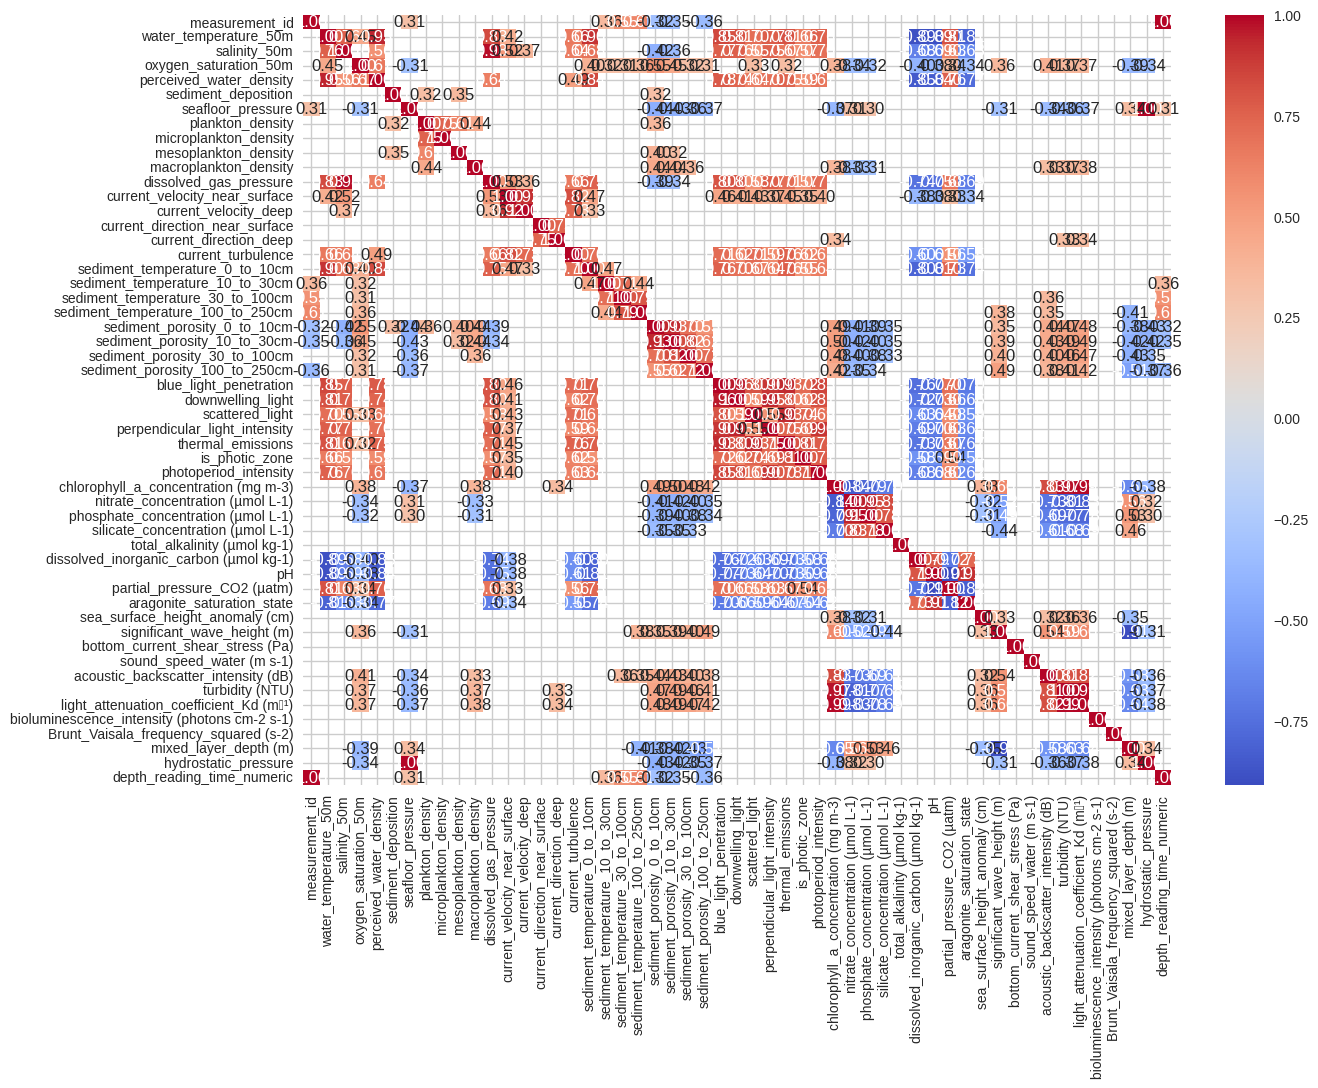

In [ ]:
corr = df.corr()
mask = abs(corr) < 0.3
plt.figure(figsize=(14, 10))
sns.heatmap(corr.mask(mask), cmap='coolwarm', annot=True, fmt=".2f")

# Feature Engineering

## Missing Value Imputation from Correlations

In [ ]:
# --- 1. Compute Correlations & Find “Sparse” Features ---
corr = df.corr().abs()

threshold     = 0.3   # consider ‘high’ correlation
min_neighbors = 5     # require at least 5 strong friends

sparse_summary = []
for feat in corr.columns:
    count = (corr[feat].drop(feat) >= threshold).sum()
    sparse_summary.append({
        "feature": feat,
        "n_strong_neighbors": count,
        "sparse": (count < min_neighbors)
    })

sparse_df = pd.DataFrame(sparse_summary).set_index("feature")
print("\n=== Sparse Correlation Summary ===")
print(sparse_df.sort_values("n_strong_neighbors").head(20))
# any feature with sparse_df.loc[f,'sparse']==True is “sparse”


=== Sparse Correlation Summary ===
                                              n_strong_neighbors  sparse
feature                                                                 
bioluminescence_intensity (photons cm-2 s-1)                   0    True
sound_speed_water (m s-1)                                      0    True
bottom_current_shear_stress (Pa)                               0    True
Brunt_Vaisala_frequency_squared (s-2)                          0    True
total_alkalinity (µmol kg-1)                                   0    True
current_direction_near_surface                                 1    True
microplankton_density                                          1    True
sediment_deposition                                            3    True
mesoplankton_density                                           4    True
current_direction_deep                                         4    True
current_velocity_deep                                          5   False
plankton_densit

In [ ]:
# Drop 0-strong-neighbour cols
cols_to_drop = [
    'bioluminescence_intensity (photons cm-2 s-1)',
    'sound_speed_water (m s-1)',
    'bottom_current_shear_stress (Pa)',
    'Brunt_Vaisala_frequency_squared (s-2)',
    'total_alkalinity (µmol kg-1)'
]

# Drop from both df and df_test
df = df.drop(columns=cols_to_drop)
df_test = df_test.drop(columns=cols_to_drop)


In [ ]:
# Drop 1-strong-neighbour cols
cols_to_drop = [
    'current_direction_near_surface',
    'microplankton_density',
]

# Drop from both df and df_test
df = df.drop(columns=cols_to_drop)
df_test = df_test.drop(columns=cols_to_drop)

In [ ]:
df.columns

Index(['measurement_id', 'water_temperature_50m', 'salinity_50m',
       'oxygen_saturation_50m', 'perceived_water_density',
       'sediment_deposition', 'seafloor_pressure', 'plankton_density',
       'mesoplankton_density', 'macroplankton_density',
       'dissolved_gas_pressure', 'current_velocity_near_surface',
       'current_velocity_deep', 'current_direction_deep', 'current_turbulence',
       'sediment_temperature_0_to_10cm', 'sediment_temperature_10_to_30cm',
       'sediment_temperature_30_to_100cm', 'sediment_temperature_100_to_250cm',
       'sediment_porosity_0_to_10cm', 'sediment_porosity_10_to_30cm',
       'sediment_porosity_30_to_100cm', 'sediment_porosity_100_to_250cm',
       'blue_light_penetration', 'downwelling_light', 'scattered_light',
       'perpendicular_light_intensity', 'thermal_emissions', 'is_photic_zone',
       'photoperiod_intensity', 'chlorophyll_a_concentration (mg m-3)',
       'nitrate_concentration (µmol L-1)',
       'phosphate_concentration (µm

## Engineering Total Light Exposure and Blue Light Penetration in test.csv

In [ ]:
# Compare the two columns only where both are not null
mask = df_test["blue_light_penetration"].notna() & df_test["total_light_exposure"].notna()
equal_values = (df_test.loc[mask, "blue_light_penetration"] == df_test.loc[mask, "total_light_exposure"])

# Check if all values are equal
all_equal = equal_values.all()

print("All non-null overlapping values are equal:", all_equal)

# (Optional) Show how many are not equal if any
if not all_equal:
    print("Number of differing values:", (~equal_values).sum())
    print("Sample differing rows:")
    print(df_test.loc[mask][~equal_values])

All non-null overlapping values are equal: True


In [ ]:
# Fill missing values in 'blue_light_penetration' with values from 'total_light_exposure'
df_test["blue_light_penetration"] = df_test["blue_light_penetration"].combine_first(df_test["total_light_exposure"])

# Drop the now redundant 'total_light_exposure' column
df_test.drop(columns=["total_light_exposure"], inplace=True)

# (Optional) Save the updated DataFrame
df_test.to_csv("test_updated.csv", index=False)

I dropped the total_light_exposure column and merged them all to blue light penetration

# MODELING

## Imputations

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X = df.drop('hydrostatic_pressure', axis=1)
y = df['hydrostatic_pressure']

In [ ]:
X = X.select_dtypes(exclude=["datetime64[ns]", "datetime64[ns, UTC]"])

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class OutlierImputer(BaseEstimator, TransformerMixin):
    def __init__(self, heavy_thresh=10.0, moderate_thresh=2.0, random_state=0):
        self.heavy_thresh = heavy_thresh
        self.moderate_thresh = moderate_thresh
        self.random_state = random_state

    def fit(self, X, y=None):
        self.bounds_ = {}
        self.heavy_cols_ = []
        self.moderate_cols_ = []
        self.impute_strategies_ = {}

        for col in X.select_dtypes(include="number").columns:
            s = X[col].dropna()
            Q1, Q3 = s.quantile([0.25, 0.75])
            IQR = Q3 - Q1
            lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
            self.bounds_[col] = (lower, upper)

            # Outlier classification
            pct = ((s < lower) | (s > upper)).sum() / len(s) * 100
            if pct >= self.heavy_thresh:
                self.heavy_cols_.append(col)
            elif pct >= self.moderate_thresh:
                self.moderate_cols_.append(col)

            # Imputation strategy selection
            if s.isnull().any():
                s_mean = s.fillna(s.mean())
                s_median = s.fillna(s.median())
                mean_skew = s_mean.skew()
                median_skew = s_median.skew()
                if abs(mean_skew) < abs(median_skew):
                    self.impute_strategies_[col] = ("mean", s.mean())
                else:
                    self.impute_strategies_[col] = ("median", s.median())

        return self

    def transform(self, X):
        X = X.copy()

        # Clip moderate outliers
        for col in self.moderate_cols_:
            low, high = self.bounds_[col]
            X[col] = X[col].clip(lower=low, upper=high)

        # Winsorize heavy outliers
        for col in self.heavy_cols_:
            p05, p95 = X[col].quantile([0.05, 0.95])
            X[col] = X[col].clip(lower=p05, upper=p95)

        # Apply stored imputation
        for col, (strategy, value) in self.impute_strategies_.items():
            if col in X.columns:
                X[col] = X[col].fillna(value)

        return X


SkewAwareHybridImputer is the one we're actually using here, these were its best parameters from hyperparameter tuning with k-fold cross validation for random forest:

Best R² score from cross-validation: 0.9167
Best parameters found:
{'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 0.5, 'model__max_depth': 20}
From SkewAwareMissingValueImputer, KNN with correlations and mean-median simple imputation- 19 min 5 folds

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

class SkewAwareHybridImputer(BaseEstimator, TransformerMixin):
    def __init__(self, skew_thresh=1.0, missing_thresh=0.3, knn_k=10):
        self.skew_thresh = skew_thresh
        self.missing_thresh = missing_thresh
        self.knn_k = knn_k
        self.imputation_map_ = {}
        self.knn_features_ = []
        self.knn_imputer_ = None
        self.categorical_impute_map_ = {}

    def fit(self, X, y=None):
        X = X.copy()
        numeric = X.select_dtypes(include=['number'])
        categorical = X.select_dtypes(include=['object', 'category', 'bool'])

        # Compute numeric imputation strategy
        for col in numeric.columns:
            missing_ratio = numeric[col].isna().mean()
            if missing_ratio > self.missing_thresh:
                self.knn_features_.append(col)
            else:
                skew = numeric[col].skew()
                if skew < -self.skew_thresh or skew > self.skew_thresh:
                    self.imputation_map_[col] = ('median', numeric[col].median())
                else:
                    self.imputation_map_[col] = ('mean', numeric[col].mean())

        # Compute categorical/bool mode values
        for col in categorical.columns:
            mode = X[col].mode(dropna=True)
            if not mode.empty:
                self.categorical_impute_map_[col] = mode[0]

        # Prepare KNN imputer for selected numeric features
        if self.knn_features_:
            corr = numeric.corr().abs()
            all_knn_related = set()
            self.knn_related_ = {}

            for col in self.knn_features_:
                top_k = corr[col].drop(col).nlargest(self.knn_k).index.tolist()
                self.knn_related_[col] = [col] + top_k
                all_knn_related.update(self.knn_related_[col])

            self.knn_all_features_ = sorted(all_knn_related)
            knn_data = numeric[self.knn_all_features_]
            self.knn_imputer_ = KNNImputer(n_neighbors=self.knn_k)
            self.knn_imputer_.fit(knn_data)

        return self

    def transform(self, X):
        X = X.copy()
        numeric = X.select_dtypes(include=['number'])
        categorical = X.select_dtypes(include=['object', 'category', 'bool'])

        # Apply mean/median imputation
        for col, (method, value) in self.imputation_map_.items():
            numeric[col] = numeric[col].fillna(value)

        # Apply KNN imputation
        if self.knn_imputer_:
            knn_data = numeric[self.knn_all_features_]
            knn_filled = self.knn_imputer_.transform(knn_data)
            knn_filled_df = pd.DataFrame(knn_filled, columns=self.knn_all_features_, index=numeric.index)

            for col in self.knn_features_:
                numeric[col] = knn_filled_df[col]

        # Apply mode imputation for categorical/bool columns
        for col, value in self.categorical_impute_map_.items():
            X[col] = X[col].fillna(value)

        X[numeric.columns] = numeric

         # Print total number of nulls left
        total_nulls = X.isna().sum().sum()
        print(f"Total nulls remaining after imputation: {total_nulls}")

        return X


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer
import pandas as pd

class PureKNNImputer(BaseEstimator, TransformerMixin):
    def __init__(self, knn_k=10):
        self.knn_k = knn_k
        self.knn_imputer_ = None
        self.knn_features_ = []
        self.knn_related_ = {}

    def fit(self, X, y=None):
        X = X.copy()
        numeric = X.select_dtypes(include=['number'])

        corr = numeric.corr().abs()
        all_knn_related = set()

        # Determine top-k correlated features (including self) for each column
        for col in numeric.columns:
            top_k = corr[col].drop(col).nlargest(self.knn_k).index.tolist()
            self.knn_related_[col] = [col] + top_k
            all_knn_related.update(self.knn_related_[col])

        self.knn_features_ = sorted(all_knn_related)
        knn_data = numeric[self.knn_features_]
        self.knn_imputer_ = KNNImputer(n_neighbors=self.knn_k)
        self.knn_imputer_.fit(knn_data)

        return self

    def transform(self, X):
        X = X.copy()
        numeric = X.select_dtypes(include=['number'])

        knn_data = numeric[self.knn_features_]
        knn_filled = self.knn_imputer_.transform(knn_data)
        knn_filled_df = pd.DataFrame(knn_filled, columns=self.knn_features_, index=numeric.index)

        for col in numeric.columns:
            if col in knn_filled_df.columns:
                numeric[col] = knn_filled_df[col]

        X[numeric.columns] = numeric

         # Print total number of nulls left
        total_nulls = X.isna().sum().sum()
        print(f"Total nulls remaining after imputation: {total_nulls}")

        return X


## Random Forest

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor


pipeline_skewaware = Pipeline([ # This is meant to be random forest pipeline
    ('missing_imputer', SkewAwareHybridImputer(
        knn_k=5,
    )),
    ('model', RandomForestRegressor(random_state=42))
])


In [ ]:
# Step 1: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Fit the pipeline on training data
pipeline_skewaware.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred = pipeline_skewaware.predict(X_test)

# Step 4: Evaluate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² score on test set: {r2:.4f}")

R² score on test set: 0.9244


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2', 0.5]
}

search = RandomizedSearchCV(
    pipeline_skewaware,
    param_distributions=param_grid,
    n_iter=5,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('missing_imputer',
                                              SkewAwareHybridImputer(knn_k=5)),
                                             ('model',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'model__max_depth': [10, 20, 30, None],
                                        'model__max_features': ['sqrt', 'log2',
                                                                0.5],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2', verbose=1)

In [ ]:
#print(f"Best R² score from cross-validation: {search.best_score_:.4f}")
#print("Best parameters found:")
#print(search.best_params_)

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score

# # Step 1: Train-test split (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # Step 2: Fit the pipeline on training data
# pipeline_skewaware.fit(X_train, y_train)

# # Step 3: Predict on test data
# y_pred = pipeline_skewaware.predict(X_test)

# # Step 4: Evaluate R² score
# r2 = r2_score(y_test, y_pred)
# print(f"R² score on test set: {r2:.4f}")


In [ ]:
# importances = pipeline_skewaware.named_steps['model'].feature_importances_
# feature_names = X.columns
# feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
# feature_importances = feature_importances.sort_values(by='importance', ascending=False)
# print(feature_importances.head(10)) # Print top 10 features


In [ ]:
# # Refit the pipeline on the full dataset using best parameters
# #best_params = search.best_params_
# best_params ={'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 0.5, 'model__max_depth': 20}
# pipeline_skewaware.set_params(**best_params)
# pipeline_skewaware.fit(X, y)  # now it's trained on 100% of your training data


In [ ]:

# # Step 3: Prepare the test set
# # Store measurement_id
# measurement_ids = df_test['measurement_id']

# # Drop target column if present
# X_submission = df_test.drop(['hydrostatic_pressure'], axis=1, errors='ignore')

# # Align columns to match training features
# X_submission = X_submission[X.columns]  # Ensure same column order and selection

# # Step 4: Predict using the final retrained pipeline
# predicted_pressure = pipeline_skewaware.predict(X_submission)

# # Step 5: Create submission DataFrame
# submission = pd.DataFrame({
#     'measurement_id': measurement_ids,
#     'hydrostatic_pressure': predicted_pressure
# })

# # Step 6: Save to CSV
# submission.to_csv('sample_submission_rf.csv', index=False)
# print("sample_submission.csv created with final retrained model.")

In [ ]:
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define pipeline using XGBoost
pipeline_xgb = Pipeline([
    ('outlier_imputer', OutlierImputer()),
    ('missing_imputer', SkewAwareHybridImputer(knn_k=5)),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1))
])

# Parameter grid for XGBoost
param_grid_xgb = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__reg_alpha': [0, 0.1, 1],
    'model__reg_lambda': [1, 1.5, 2]
}

# Randomized search
search_xgb = RandomizedSearchCV(
    pipeline_xgb,
    param_distributions=param_grid_xgb,
    n_iter=10,              # You can increase for better search
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [ ]:
# # Fit (when you're ready)
# search_xgb.fit(X, y)

In [ ]:
# print(f"Best R² score from cross-validation: {search_xgb.best_score_:.4f}")
# print("Best parameters found:")
# print(search_xgb.best_params_)

In [ ]:
# # Step 1: Train-test split (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # Step 2: Fit the pipeline on training data
# pipeline_xgb.fit(X_train, y_train)

# # Step 3: Predict on test data
# y_pred = pipeline_xgb.predict(X_test)

# # Step 4: Evaluate R² score
# r2 = r2_score(y_test, y_pred)
# print(f"R² score on test set: {r2:.4f}")


In [ ]:
# # prompt: extract the highest rank features from pipeline_xgb

# importances = pipeline_xgb.named_steps['model'].feature_importances_
# feature_names = X.columns
# feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
# feature_importances = feature_importances.sort_values(by='importance', ascending=False)
# print(feature_importances.head(10)) # Print top 10 features


In [ ]:
# # Refit the pipeline on the full dataset using best parameters
# best_params_xgb = search_xgb.best_params_
# pipeline_xgb.set_params(**best_params_xgb)
# pipeline_xgb.fit(X, y)  # now it's trained on 100% of your training data

In [ ]:

# # Step 3: Prepare the test set
# # Store measurement_id
# measurement_ids = df_test['measurement_id']

# # Drop target column if present
# X_submission = df_test.drop(['hydrostatic_pressure'], axis=1, errors='ignore')

# # Align columns to match training features
# X_submission = X_submission[X.columns]  # Ensure same column order and selection

# predicted_pressure_xgb = pipeline_xgb.predict(X_submission)

# # Step 5: Create submission DataFrame
# submission = pd.DataFrame({
#     'measurement_id': measurement_ids,
#     'hydrostatic_pressure': predicted_pressure_xgb
# })

# # Step 6: Save to CSV
# submission.to_csv('sample_submission_xgb.csv', index=False)
# print("sample_submission_xgb.csv created with final retrained model.")

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# CatBoost pipeline
pipeline_cat = Pipeline([
    ('outlier_imputer', OutlierImputer()),
    ('missing_imputer', SkewAwareHybridImputer(knn_k=5)),
    ('scaler',          StandardScaler()),   # added scaler
    # ('feature_pca',     FunctionTransformer(multi_group_pca)),
    ('model', CatBoostRegressor(
        verbose=0,
        random_state=42,
        thread_count=-1
    ))
])


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit
pipeline_cat.fit(X_train, y_train)

# Predict
y_pred = pipeline_cat.predict(X_test)

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² score on test set (CatBoost): {r2:.4f}")


R² score on test set (CatBoost): 0.9328


## PURE CATBOOST

In [ ]:
# from sklearn.model_selection import KFold, RandomizedSearchCV

# # 1) define your CV splitter
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 2) set up a CatBoost-specific param grid
param_grid_cat = {
    'model__iterations':      [100, 200, 300],
    'model__depth':           [4, 6, 8, 10],
    'model__learning_rate':   [0.01, 0.05, 0.1],
    'model__l2_leaf_reg':     [1, 3, 5],
    'model__border_count':    [32, 64, 128]
}

# 3) wrap in RandomizedSearchCV
search_cat = RandomizedSearchCV(
    pipeline_cat,
    param_distributions=param_grid_cat,
    n_iter=10,
    cv=kfold,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# # 4) when ready:
search_cat.fit(X, y)
print("Best R²:", search_cat.best_score_)
print("Best params:", search_cat.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best R²: 0.9187647974391562
Best params: {'model__learning_rate': 0.1, 'model__l2_leaf_reg': 3, 'model__iterations': 300, 'model__depth': 6, 'model__border_count': 128}


In [ ]:
from sklearn.base import clone


pipeline_cat_to_fit = clone(pipeline_cat)
best_params_cat = search_cat.best_params_
pipeline_cat_to_fit.set_params(**best_params_cat)
pipeline_cat_to_fit.fit(X, y)

Pipeline(steps=[('outlier_imputer', OutlierImputer()),
                ('missing_imputer', SkewAwareHybridImputer(knn_k=5)),
                ('scaler', StandardScaler()),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7a3218782950>)])

In [ ]:
# Step 3: Prepare the test set for CatBoost
# Store measurement_id
measurement_ids = df_test['measurement_id']

# Drop target column if present
X_submission = df_test.drop(['hydrostatic_pressure'], axis=1, errors='ignore')

# Align columns to match training features
X_submission = X_submission[X.columns]

# Step 4: Predict using CatBoost pipeline
predicted_pressure_cat = pipeline_cat_to_fit.predict(X_submission)

# Step 5: Create submission DataFrame
submission_cat = pd.DataFrame({
    'measurement_id': measurement_ids,
    'hydrostatic_pressure': predicted_pressure_cat
})

# Step 6: Save to CSV
submission_cat.to_csv('sample_submission_catboost.csv', index=False)
print("sample_submission_catboost.csv created with final CatBoost model.")

sample_submission_catboost.csv created with final CatBoost model.


## ENSEMBLE

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# ——————————————————————————————
# 1) Make sure each pipeline is set to its best params
# ——————————————————————————————
# RF (you already have best_params for pipeline_skewaware)
best_rf = {
    'model__n_estimators':    300,
    'model__max_depth':       20,
    'model__min_samples_split': 2,
    'model__min_samples_leaf': 1,
    'model__max_features':    0.5,
}
pipeline_skewaware.set_params(**best_rf)

# XGB & CatBoost you kept at their defaults—feel free to tune them similarly.
# pipeline_xgb.set_params(**best_xgb)
# pipeline_cat.set_params(**best_cat)

# ——————————————————————————————
# 2) Build the VotingRegressor
# ——————————————————————————————
voter = VotingRegressor(
    estimators=[
        ('rf',  pipeline_skewaware),
        ('xgb', pipeline_xgb),
        ('cat', pipeline_cat),
    ],
    weights=[1, 2, 32],
    n_jobs=-1
)

# ——————————————————————————————
# 3) Quick hold‐out evaluation
# ——————————————————————————————
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
voter.fit(X_tr, y_tr)
print("Voting hold‐out R²:", r2_score(y_val, voter.predict(X_val)))

# ——————————————————————————————
# 4) Full‐dataset fit & submission
# ——————————————————————————————




Voting hold‐out R²: 0.9326796773424388


In [ ]:
X = X.select_dtypes(exclude=["datetime64[ns]", "datetime64[ns, UTC]"])
voter.fit(X, y)
measurement_ids = df_test['measurement_id']




In [ ]:
train_cols = X.columns

# before predicting, reindex your test set to match
X_submission = df_test.drop(['hydrostatic_pressure'], axis=1, errors='ignore')
X_submission = X_submission.reindex(columns=train_cols, fill_value=0)

# now no more unseen‐feature errors
preds = voter.predict(X_submission)


In [ ]:
submission_vote = pd.DataFrame({
    'measurement_id': measurement_ids,
    'hydrostatic_pressure': preds
})

submission_vote.to_csv('sample_submission_vote.csv', index=False)
print("sample_submission_catboost_vote.csv created with final CatBoost model.")
